# Upper Confidence Bound (UCB)
### The Multi-armed Bandit
    - We have d arms. For example, arms are ads that we display to users each time they connect to this web page.
    - Each time a user connects to this web page, that make a round.
    - At each round n, we choose one ad to display to the users.
    - At each round n, ad i gives reward Ri(n) belongs to {0, 1}: Ri(n) = 1, if the user clicked on the ad i, 0 if the user didnt.
    - Our goal is to maximize the total reward we get over many rounds.
    
- Steps for Upper Confidence Bound;
        - Step 1 : At each round n, we consider two number for each ad i:
                - Ni(n) - the number of time the ad i was selected up to round n,
                - Ri(n) - the sum of rewards of the ad i up to round n.
        - Step 2 : Form these two number we compute:
                - The average reward of ad i up to round n
                    r(n) = the average reward of slot machine = R(n) / N(n).
                - The confidence interval [Ri(n) - Δi(n), Ri(n) + Δi(n)] at round n with
                    Δi(n) = √(3/2)(log(n)/Ni(n))
        - Step 3 : We select thr ad i that has the maximum UCB [ Ri(n) + Δi(n) ]

**Importing the Libraries**

In [1]:
# Numpy allows us to work with array.
import numpy as np

# Maptplotlib which allows us to plot some chart.
import matplotlib.pyplot as plt

# Pandas allows us to not only import the datasets but also create the matrix of features(independent) and 
# dependent variable.
import pandas as pd

**Importing the Dataset**

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

**Implementing UCB**

In [3]:
import math

# Total Number of rounds to show User
N = 10000

# Number of ads
d = 10

# Full list of rounds
ads_selected = []

number_of_selections = [0] * d
sums_of_rewads = [0] * d
total_rewards = 0

# Average Rewards and Confidence Interval 
for n in range(0, N):
    ad= 0 
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewads[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i 
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewads[ad] = sums_of_rewads[ad] + reward
    total_rewards = total_rewards + reward

**Visualising the results**

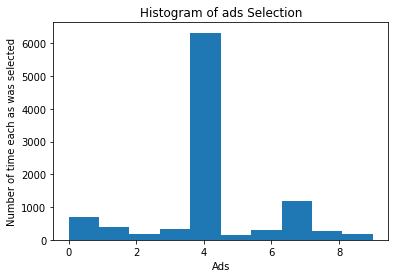

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ads Selection")
plt.xlabel("Ads")
plt.ylabel("Number of time each as was selected")
plt.show()

- Now you can check the minimun number of rounds, by changing N.
- By trying different numbers of rounds, 500 rounds is no enough for the UCB algorithm to identify that best with the highest cities and UCB identified the best ad as ad7.